In [3]:
#  Hi, my name is Tate Doherty and this is my 1986-2016 Movie Correlation Project. This Movie Correlation Project uses python in 
# Jupyter Notebooks. In this movie correlation project, we explore 6,820 movies from 1986 to 2016, examining relationships 
# between various movie attributes. I cleaned the data, used scatterplots to visualize initial correlations, calculated
# regression lines, and constructed a correlation matrix. My goal was to uncover factors affecting a movie's success and 
# understand the intricate web of influences in the world of cinema.

#import necessary libraries 

import pandas as pd
import seaborn as sns 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#read in the data from dataset: https://www.kaggle.com/datasets/danielgrijalvas/movies/

df = pd.read_csv(r"C:\Users\~\Downloads\movies.csv\movies.csv") 




In [6]:
#make sure data is imported by displaying top 5 rows

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#check for missing data 

for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print()
    print('{} - {}%'.format(col, pct_missing))


name - 0.0%

rating - 0.010041731872717789%

genre - 0.0%

year - 0.0%

released - 0.0002608242044861763%

score - 0.0003912363067292645%

votes - 0.0003912363067292645%

director - 0.0%

writer - 0.0003912363067292645%

star - 0.00013041210224308815%

country - 0.0003912363067292645%

budget - 0.2831246739697444%

gross - 0.02464788732394366%

company - 0.002217005738132499%

runtime - 0.0005216484089723526%


In [5]:
#drop columns containing missing data and make sure all columns have no missing data

df = df.dropna()
for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print()
    print('{} - {}%'.format(col, pct_missing))


name - 0.0%

rating - 0.0%

genre - 0.0%

year - 0.0%

released - 0.0%

score - 0.0%

votes - 0.0%

director - 0.0%

writer - 0.0%

star - 0.0%

country - 0.0%

budget - 0.0%

gross - 0.0%

company - 0.0%

runtime - 0.0%


In [6]:
#Check data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#change data types of columns to the correct data type

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


In [8]:
#make a new column called 'yearcorrect' because some of the movies have an incorrect year
#use the year from the 'released' column

df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


In [14]:
#sort df by gross descending

df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [10]:
#include all rows in the df

pd.set_option('display.max_rows', None)

In [1]:
#drop all duplicates

#df.drop_duplicates()



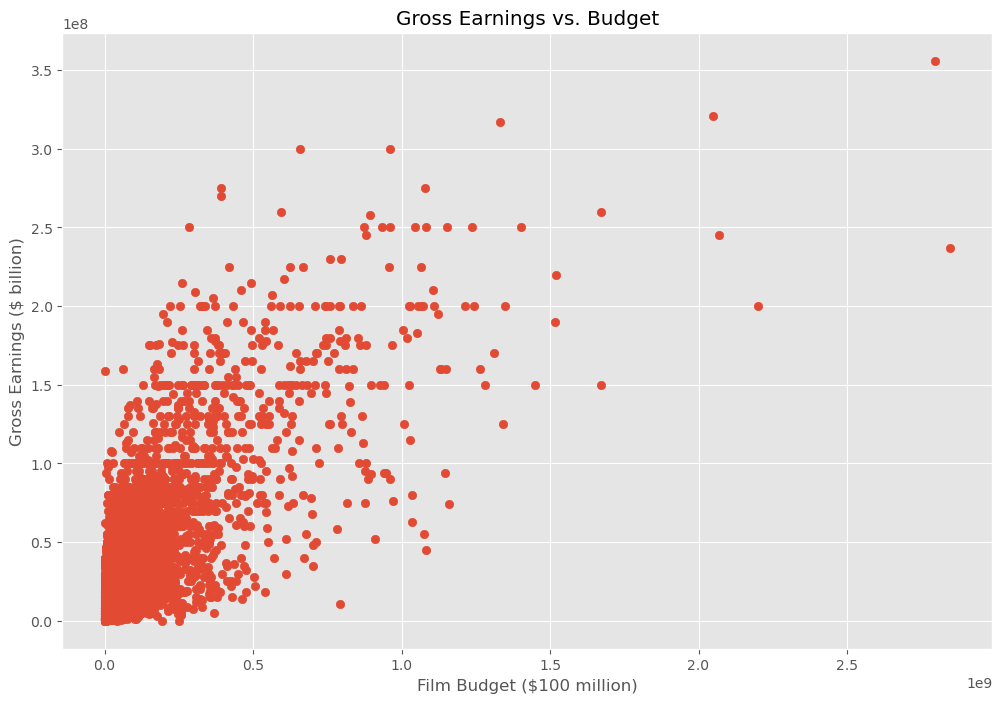

In [52]:
#create a scatterplot with gross earnings vs budget 

plt.scatter(x=df['gross'], y=df['budget'])
plt.title('Gross Earnings vs. Budget')
plt.xlabel('Film Budget ($100 million)') 
plt.ylabel('Gross Earnings ($ billion)') 
plt.show()

In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


Y = 3.34X + -16863517.23


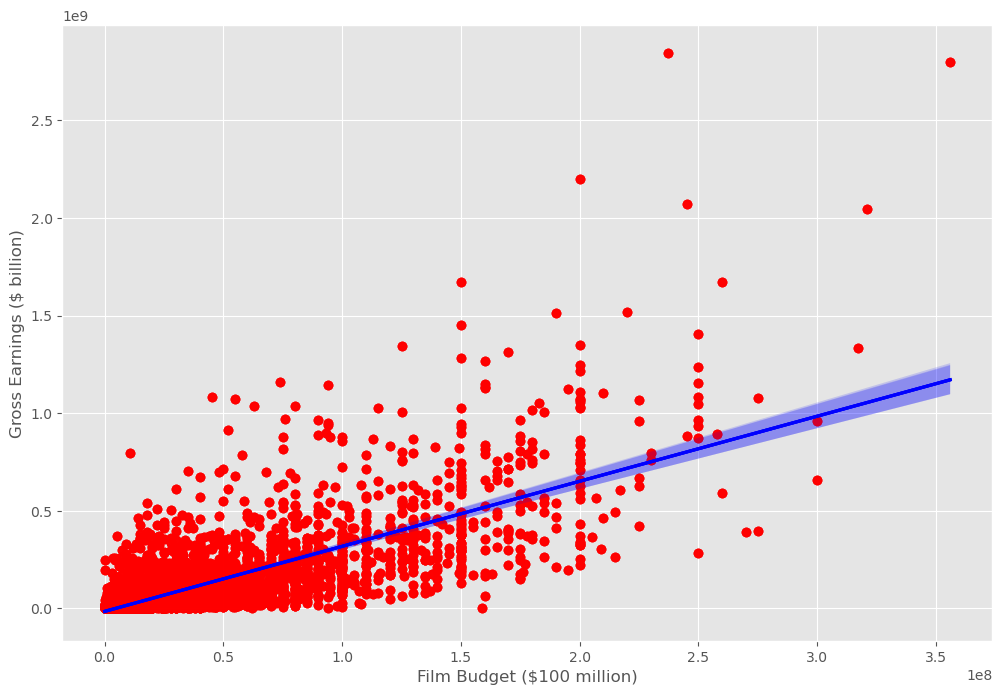

In [53]:
#plot budget vs gross scatterplot using seaborn and find the equation for the trendline

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

from scipy.stats import linregress

# Create the scatterplot with a trend line
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

# Fit a linear regression model to the data
regression_model = sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

plt.xlabel('Film Budget ($100 million)') 
plt.ylabel('Gross Earnings ($ billion)') 

# Calculate the regression statistics
slope, intercept, r_value, p_value, std_err = linregress(df['budget'], df['gross'])

# Print the equation of the trend line
print(f"Y = {slope:.2f}X + {intercept:.2f}")


In [35]:
#take a look at the correlation

df.corr(method='pearson') #pearson, kendall, spearman

C:\Users\ondoh\AppData\Local\Temp\ipykernel_31476\2032807865.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') #pearson, kendall, spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


C:\Users\ondoh\AppData\Local\Temp\ipykernel_31476\1301282912.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


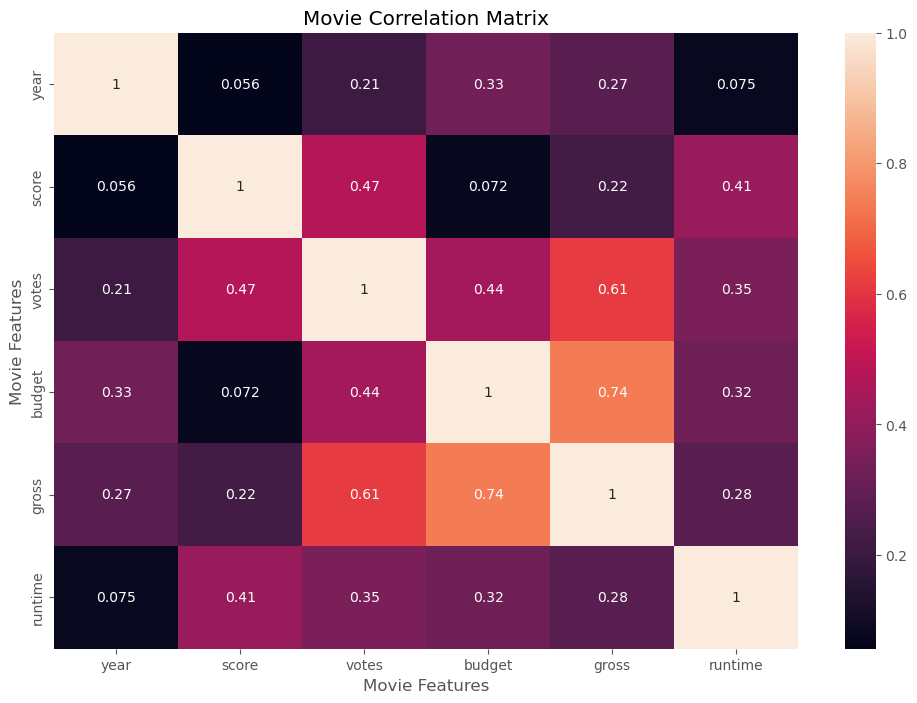

In [37]:
#create a heatmap using sns based on correlation

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Movie Correlation Matrix')
plt.xlabel('Movie Features') 
plt.ylabel('Movie Features') 

plt.show()

In [54]:
#convert categorical values into numerical values

df_numerized = df

# Make a copy of the original DataFrame

df_numerized = df.copy()  

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# Now df_numerized contains the numerized (encoded) data
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,29
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,39
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,17
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,35
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,38


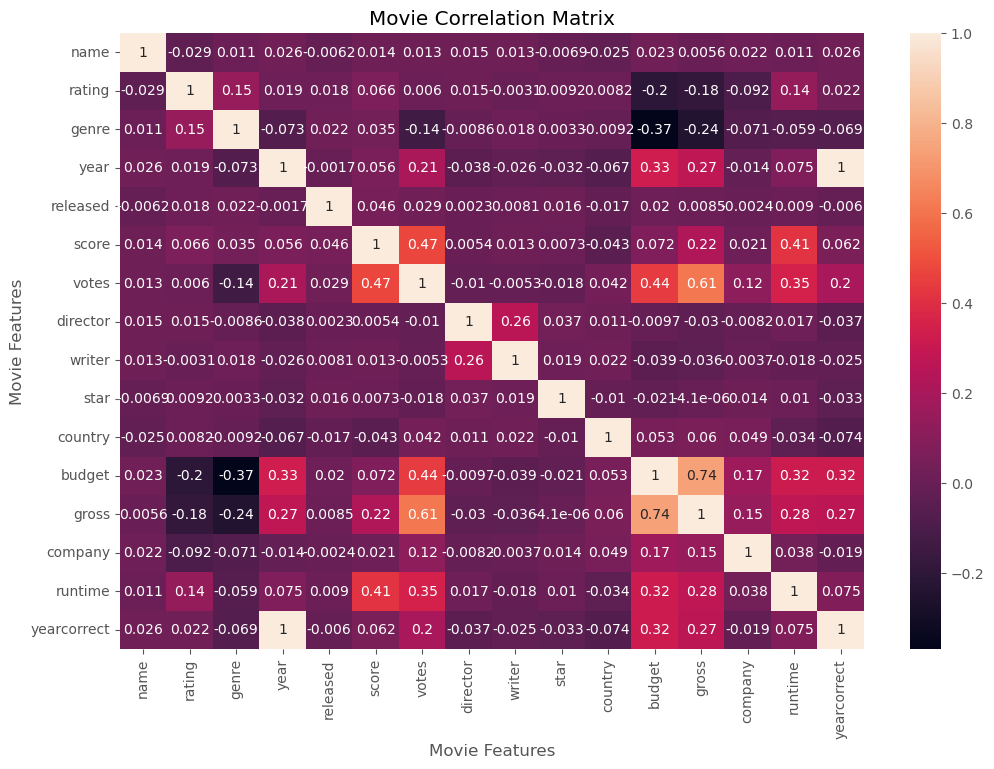

In [41]:
#create a heatmap using sns based on correlation with the additional numerical column values

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Movie Correlation Matrix')
plt.xlabel('Movie Features') 
plt.ylabel('Movie Features') 

plt.show()

In [50]:
# display the correlations between different pairs of columns in the df

correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs


genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [51]:
#sort the correlatiuons and identify pairs of columns with correlation coefficients

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

# 1. The correlation between "gross" and "votes" is moderately positive at approximately 0.615
# 2. "Gross" and "budget" show a stronger positive correlation of around 0.740

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64